In [1]:
from zipfile import ZipFile
with ZipFile(r'archive.zip') as zfile:
    zfile.extractall(path=r'D:\codes\anamolydetection')


In [2]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib
from sklearn.cluster import DBSCAN

In [3]:
data = pd.read_csv(r'creditcard.csv')
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
X = data.drop('Class',axis=1)
y = data['Class']

In [5]:
X

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,1.475829,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.059616,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.001396,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.127434,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00


In [6]:
y.value_counts()

Class
0    284315
1       492
Name: count, dtype: int64

In [7]:
scaler = StandardScaler()
X_std = scaler.fit_transform(X)
X_std

array([[-1.99658302, -0.69424232, -0.04407492, ...,  0.33089162,
        -0.06378115,  0.24496426],
       [-1.99658302,  0.60849633,  0.16117592, ..., -0.02225568,
         0.04460752, -0.34247454],
       [-1.99656197, -0.69350046, -0.81157783, ..., -0.13713686,
        -0.18102083,  1.16068593],
       ...,
       [ 1.6419735 ,  0.98002374, -0.18243372, ...,  0.01103672,
        -0.0804672 , -0.0818393 ],
       [ 1.6419735 , -0.12275539,  0.32125034, ...,  0.26960398,
         0.31668678, -0.31324853],
       [ 1.64205773, -0.27233093, -0.11489898, ..., -0.00598394,
         0.04134999,  0.51435531]])

In [8]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_std)
print(X_pca)

[[ 0.41663045 -2.53266428]
 [-0.39345348 -2.0773255 ]
 [ 1.86852545 -2.53349699]
 ...
 [-0.19406338  2.07078798]
 [-0.46608925  1.22539363]
 [ 0.76759651  1.90590292]]


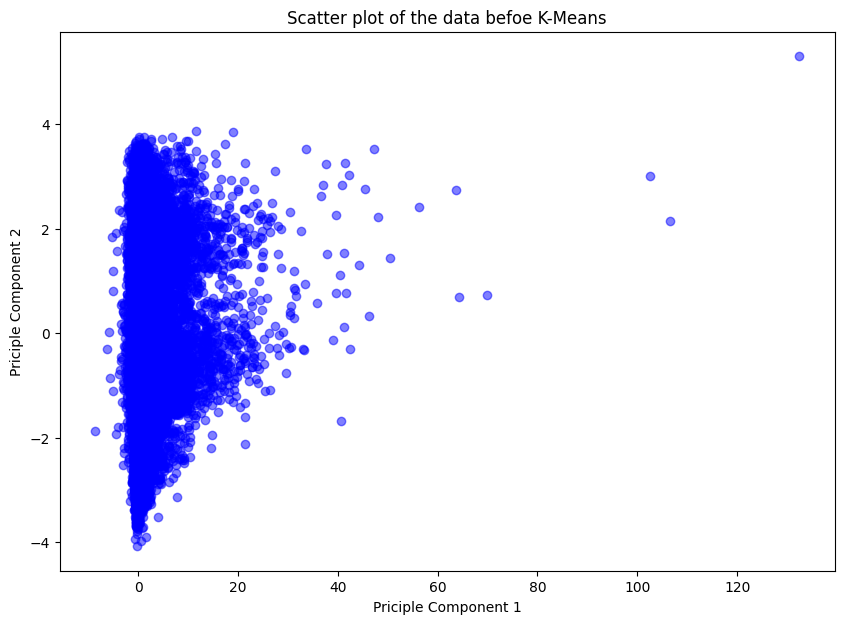

In [9]:
plt.figure(figsize=(10,7))
plt.scatter(X_pca[:,0],X_pca[:,1],c='blue',alpha=0.5)
plt.title('Scatter plot of the data befoe K-Means')
plt.xlabel('Priciple Component 1')
plt.ylabel('Priciple Component 2')
plt.show()

In [10]:
kmeans = KMeans(n_clusters=2,random_state=42)
kmeans.fit(X_pca)

KMeans(n_clusters=2, random_state=42)

In [11]:
labels = kmeans.predict(X_pca)
labels

array([0, 0, 0, ..., 1, 1, 1])

In [12]:
unique,counts = np.unique(labels,return_counts=True)
print(dict(zip(unique,counts)))

{0: 156781, 1: 128026}


<Figure size 1300x1000 with 0 Axes>

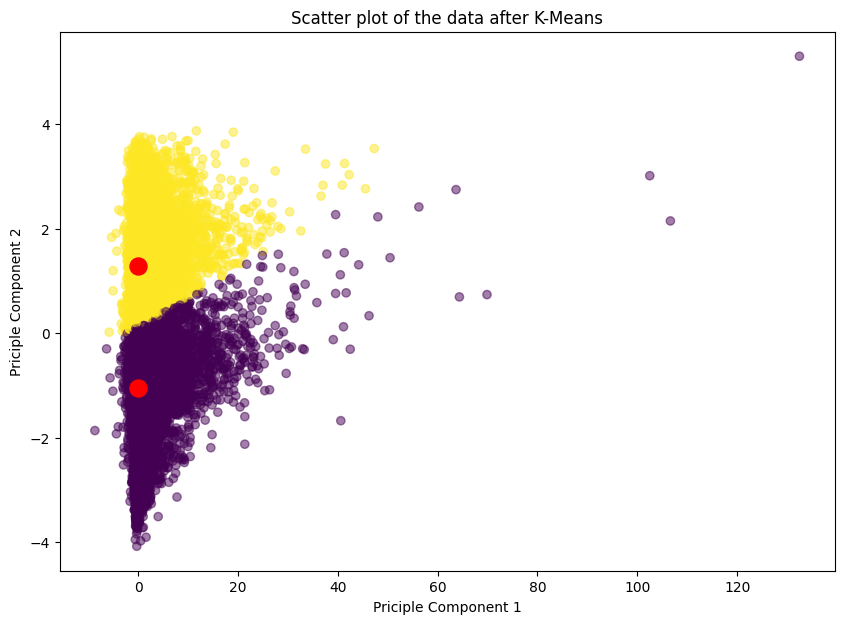

In [13]:
plt.figure(figsize=(13,10))
plt.figure(figsize=(10,7))
plt.scatter(X_pca[:,0],X_pca[:,1],c=labels,cmap='viridis',alpha=0.5)
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],s=150,c='red')
plt.title('Scatter plot of the data after K-Means')
plt.xlabel('Priciple Component 1')
plt.ylabel('Priciple Component 2')
plt.show()

In [14]:
distance = kmeans.transform(X_pca)
distance

array([[1.52653945, 3.85009571],
       [1.12329382, 3.37909926],
       [2.34131039, 4.2842178 ],
       ...,
       [3.12977928, 0.79394764],
       [2.33384718, 0.39944636],
       [3.03869211, 1.04287822]])

In [15]:
scores = distance.min(axis=1)
scores

array([1.52653945, 1.12329382, 2.34131039, ..., 0.79394764, 0.39944636,
       1.04287822])

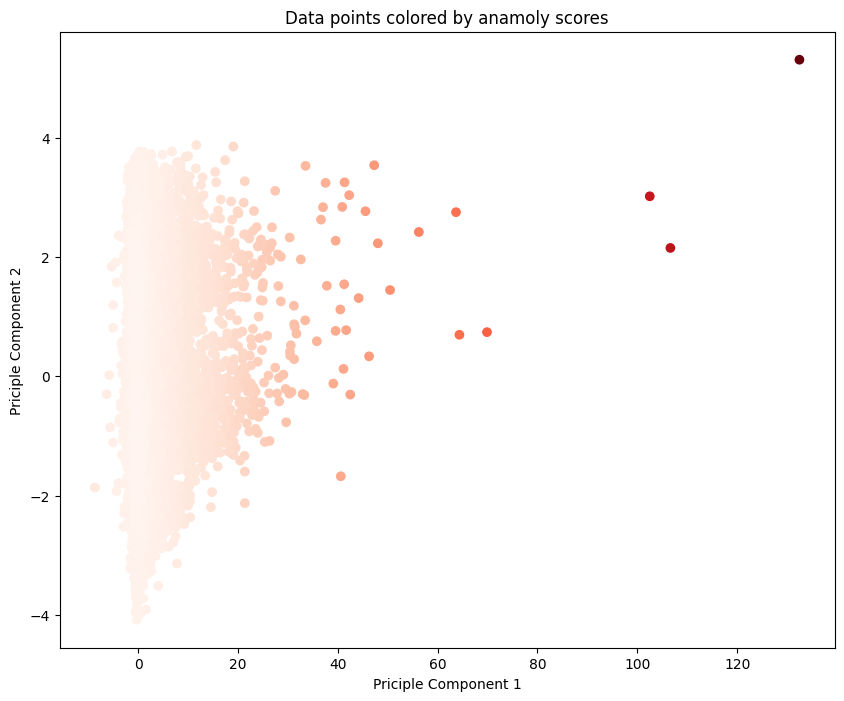

In [16]:
cmap = plt.get_cmap('Reds')
normalized_scores = (scores-min(scores))/(max(scores)-min(scores))
plt.figure(figsize=(10,8))
plt.scatter(X_pca[:,0],X_pca[:,1],c=cmap(normalized_scores))
plt.title('Data points colored by anamoly scores')
plt.xlabel('Priciple Component 1')
plt.ylabel('Priciple Component 2')
plt.show()

In [17]:
normalized_scores_series = pd.Series(normalized_scores,name='Anamoly_Score')
data_with_scores = pd.concat([data.reset_index(drop=True),normalized_scores_series],axis=1)

In [18]:
data_with_scores[['Time','V1','V2','V3','Amount','Class','Anamoly_Score']]

,Time,V1,V2,V3,Amount,Class,Anamoly_Score
0,0.0,-1.359807,-0.072781,2.536347,149.62,0,0.011504
1,0.0,1.191857,0.266151,0.166480,2.69,0,0.008462
2,1.0,-1.358354,-1.340163,1.773209,378.66,0,0.017650
3,1.0,-0.966272,-0.185226,1.792993,123.50,0,0.005861
4,2.0,-1.158233,0.877737,1.548718,69.99,0,0.003338
...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,0.77,0,0.011671
284803,172787.0,-0.732789,-0.055080,2.035030,24.79,0,0.004012
284804,172788.0,1.919565,-0.301254,-3.249640,67.88,0,0.005978
284805,172788.0,-0.240440,0.530483,0.702510,10.00,0,0.003002


In [19]:
grouped_data = data_with_scores.groupby('Class')['Anamoly_Score'].agg(['count','mean'])
grouped_data

,count,mean
Class,,
0,284315,0.006229
1,492,0.008631


In [20]:
from scipy.stats import ttest_ind, mannwhitneyu 
# Separating the scores for both classes
scores_class_0 = data_with_scores[data_with_scores['Class']==0]['Anamoly_Score']
scores_class_1= data_with_scores[data_with_scores['Class']==1]['Anamoly_Score']
# Two-sample t-test
t_stat, p_val_t= ttest_ind(scores_class_0, scores_class_1)
print("t-test p-value:", p_val_t)
# Mann-Whitney U test
u_stat, p_val_u= mannwhitneyu(scores_class_0, scores_class_1, alternative='two-sided')
print("Mann-Whitney U test p-value:", p_val_u)


t-test p-value: 2.4998539586651264e-08
Mann-Whitney U test p-value: 5.61961595207017e-36


In [21]:
# reject the hypothesis that the means are same as it is p < 0.05

In [22]:
# pca_X = PCA(n_components=10)
# X_reduced = pca_X.fit_transform(X)

In [23]:
len(X_pca)

284807

In [24]:
data

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


In [25]:
dbscan = DBSCAN(eps=0.5, min_samples=5)
X_subset = X_pca[:70000]  # Use only the first 5000 samples
labels = dbscan.fit_predict(X_subset) 

In [26]:
# dbscan = DBSCAN(eps=0.5, min_samples=5)
# labels = dbscan.fit_predict(X_reduced)


In [27]:
core_samples_mask = np.zeros_like(dbscan.labels_,dtype=bool)
core_samples_mask[dbscan.core_sample_indices_] = True
labels = dbscan.labels_

In [28]:
n_cluster = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)
print(n_cluster)
print(n_noise_)

8
62


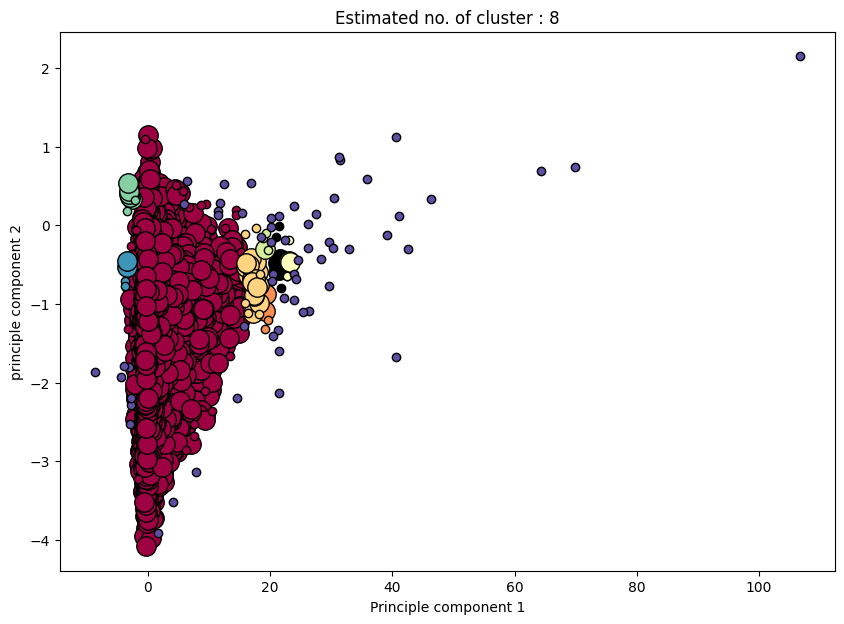

In [29]:
plt.figure(figsize=(10,7))
unique_labels = set(labels)
colors = [plt.cm.Spectral(each) for each in np.linspace(0,1,len(unique_labels))]
for k,col in zip(unique_labels,colors):
    if k == 1:
        col = [0,0,0,1]
    class_member_mask = (labels==k)
    xy=X_subset[class_member_mask & core_samples_mask]
    plt.plot(xy[:,0],xy[:,1],'o',markerfacecolor = tuple(col),markeredgecolor = 'k',markersize = 14)
    xy = X_subset[class_member_mask & ~core_samples_mask]
    plt.plot(xy[:,0],xy[:,1],'o',markerfacecolor = tuple(col),markeredgecolor = 'k',markersize = 6)  

plt.title(f"Estimated no. of cluster : {n_cluster}")  
plt.xlabel("Principle component 1")
plt.ylabel("principle component 2")
plt.show()